# 9.1 A Brief matplotlib API Primer

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

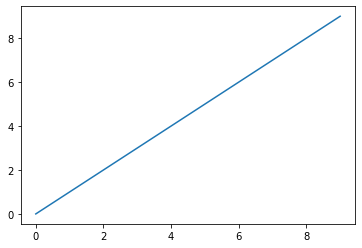

In [3]:
plt.plot(data)

## 9.1.1 Figures and Subplots

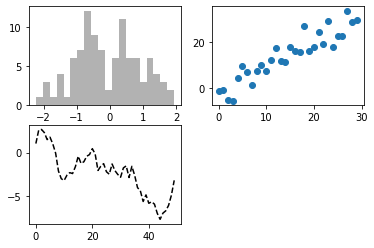

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots must put all of the plotting commands in a single notebook cell.

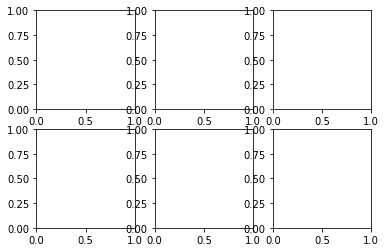

In [5]:
fig, axes = plt.subplots(2,3)

In [6]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116b8ec50>,
      dtype=object)

In [7]:
axes[0,1]

In [8]:
type(axes)

numpy.ndarray

In [9]:
type(fig)

matplotlib.figure.Figure

**Adjusting the spacing around subplots**

In [10]:
# subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = None)

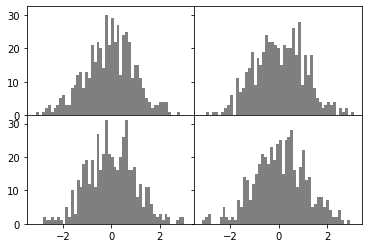

In [11]:
fig, axes = plt.subplots(2,2,sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5)
plt.subplots_adjust(wspace = 0, hspace = 0)

## 9.1.2 Colors, Markers, and Line Styles

In [12]:
# ax.plot(x,y,'g--')
# ax.plot(x,y,linestyle = '--', color = 'g')

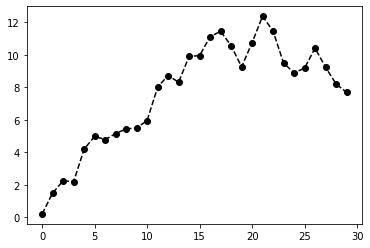

In [13]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

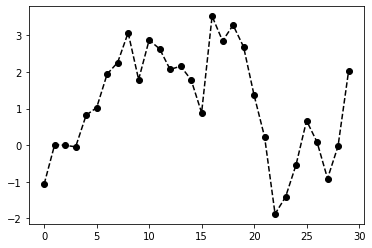

In [14]:
plt.plot(randn(30).cumsum(), color = 'k', linestyle = 'dashed', marker = 'o')

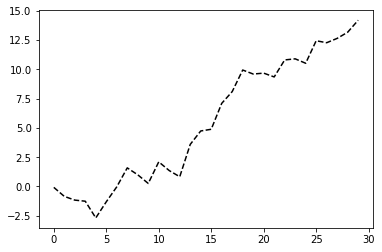

In [15]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label = 'Default')

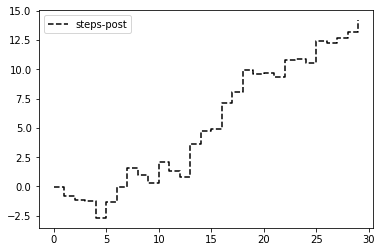

In [16]:
plt.plot(data, 'k--', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc = 'best')

## 9.1.3 Ticks, Labels, and Legends

**Setting the title, axis labels, ticks, and ticklabels**

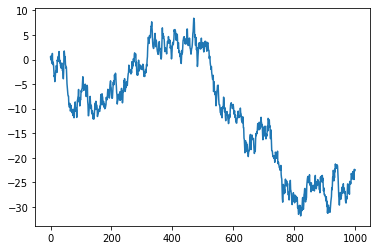

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

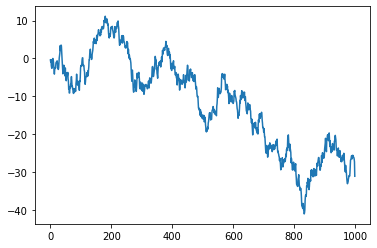

In [18]:
plt.figure().add_subplot(1,1,1).plot(np.random.randn(1000).cumsum())

Text(0.5, 0, 'Stages')

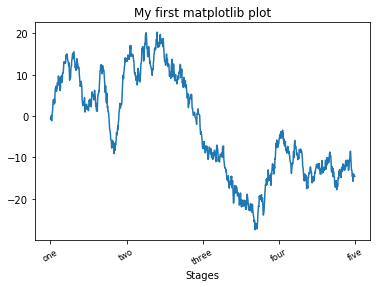

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation = 30, fontsize = 'small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

[[<matplotlib.axis.XTick at 0x1178698d0>,
 [Text(0, 0, 'one'),
  Text(0, 0, 'two'),
  Text(0, 0, 'three'),
  Text(0, 0, 'four'),
  Text(0, 0, 'five')],
 Text(0.5, 0, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

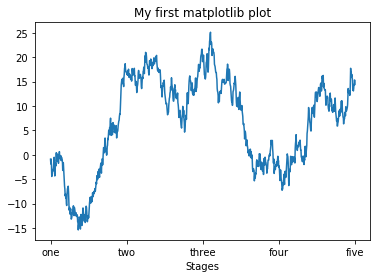

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

props = {
    'title':'My first matplotlib plot',
    'xlabel':'Stages',
    'xticks':[0,250,500,750,1000],
    'xticklabels':['one','two','three','four','five']
}
ax.set(**props)

**Adding legends**

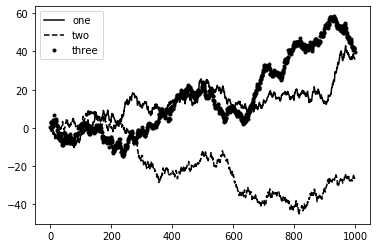

In [21]:
from numpy.random import randn

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'k--', label = 'two')
ax.plot(randn(1000).cumsum(), 'k.', label = 'three')
ax.legend(loc = 'best')

## 9.1.4 Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008 - 2009 financial crisis')

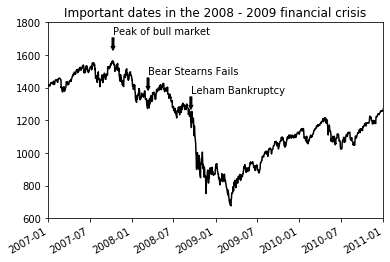

In [22]:
from datetime import datetime 
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Data Science/Python/Python for data analysis 2nd/examples/spx.csv',
                   index_col = 0,
                   parse_dates = True)

spx = data['SPX']

spx.plot(ax = ax, style = 'k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Leham Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007 - 2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in the 2008 - 2009 financial crisis')

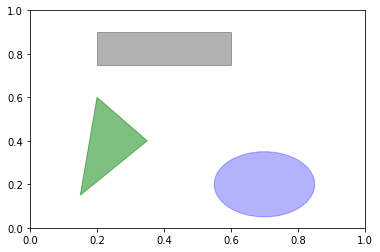

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color = 'k', alpha = 0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color = 'b', alpha = 0.3)
pgon = plt.Polygon([[0.15, 0.15],[0.35, 0.4],[0.2, 0.6]], color = 'g', alpha = 0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 9.1.5 Saving Plots to File

In [24]:
plt.savefig('figpath.svg')
plt.savefig('figpath.pdf')

<Figure size 432x288 with 0 Axes>

In [25]:
plt.savefig('figpath.png', dpi = 400, bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

In [26]:
from io import BytesIO

buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

## 9.1.6 matplotlib Configuration

Global configuration

In [ ]:
plt.rc('figure', figsize = (10,10))

In [ ]:
font_options = {'family':'monospace', 
                'weight':'bold',
                'size':'small'}

plt.rc('font', **font_options)

# 9.2 Plotting with pandas and seaborn

## 9.2.1 Line Plots

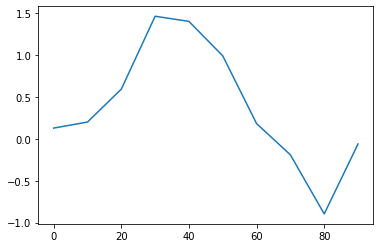

In [27]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))
s.plot()

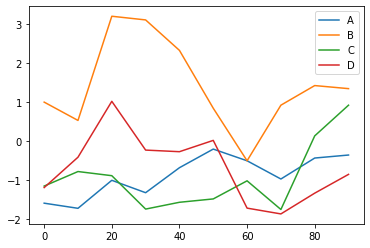

In [28]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                  columns = ['A','B','C','D'],
                  index = np.arange(0,100,10))

df.plot()

In [29]:
df

,A,B,C,D
0,-1.598701,0.996086,-1.159280,-1.198097
10,-1.730523,0.526050,-0.786352,-0.418155
20,-1.011348,3.201154,-0.892848,1.016752
30,-1.329788,3.106765,-1.750197,-0.235568
40,-0.688000,2.324789,-1.575773,-0.276688
50,-0.209734,0.839169,-1.489442,0.013574
60,-0.509984,-0.510274,-1.024613,-1.725573
70,-0.978063,0.917541,-1.760723,-1.874388
80,-0.439621,1.421173,0.129287,-1.341446
90,-0.362373,1.342354,0.917464,-0.858931


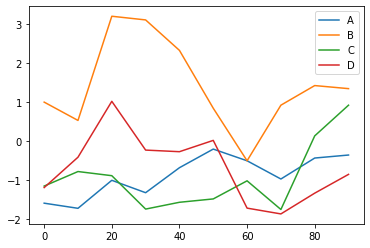

In [30]:
df.plot.line()

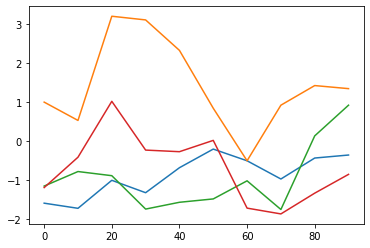

In [31]:
plt.plot(df)

## 9.2.2 Bar Plots

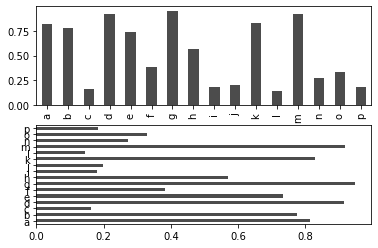

In [32]:
fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))

data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)

data.plot.barh(ax = axes[1], color = 'k', alpha = 0.7)

In [33]:
df = pd.DataFrame(np.random.rand(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns = pd.Index(['A','B','C','D'], name = 'Genus'))
df

Genus,A,B,C,D
one,0.363658,0.119355,0.603037,0.569428
two,0.819256,0.690854,0.332355,0.675215
three,0.922240,0.709620,0.397775,0.307898
four,0.965747,0.127278,0.224056,0.512803
five,0.165123,0.586775,0.021161,0.179366
six,0.001520,0.453925,0.680376,0.912214


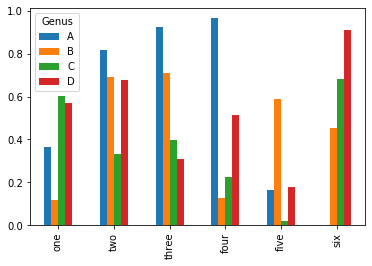

In [34]:
df.plot.bar()

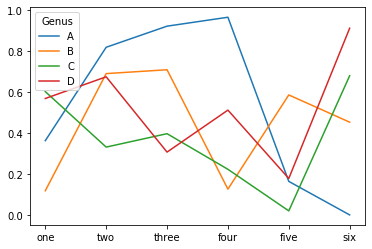

In [35]:
df.plot.line()

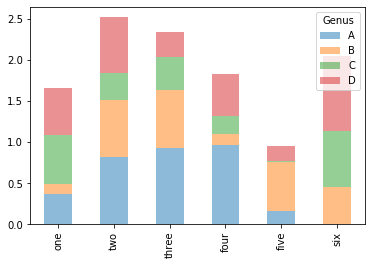

In [36]:
df.plot.bar(stacked = True, alpha = 0.5)

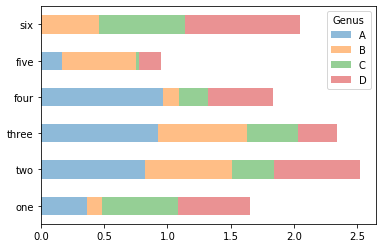

In [37]:
df.plot.barh(stacked = True, alpha = 0.5)

In [38]:
tips = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Data Science/Python/Python for data analysis 2nd/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [39]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [40]:
party_counts.shape

(4, 6)

In [41]:
# Not many 1- and 6-person parties 
party_counts = party_counts.loc[:,2:5]

In [42]:
# Normalize to sum to 1 
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


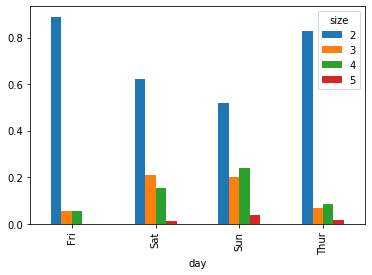

In [43]:
party_pcts.plot.bar()

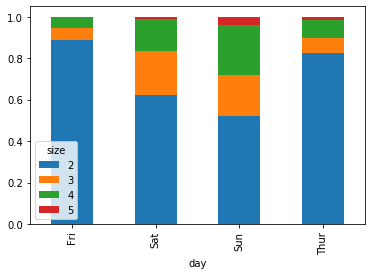

In [44]:
party_pcts.plot.bar(stacked = True)

In [45]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


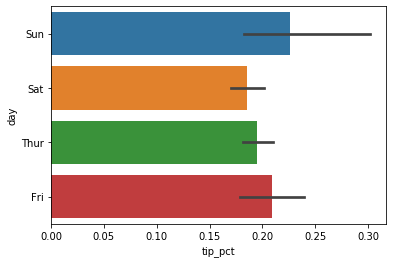

In [46]:
sns.barplot(x = 'tip_pct', y = 'day', data = tips, orient = 'h')

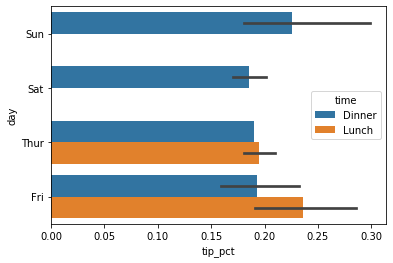

In [47]:
sns.barplot(x = 'tip_pct', y = 'day', hue = 'time', data = tips, orient = 'h')

In [48]:
sns.set(style = 'whitegrid')

## 9.2.3 Histograms and Density Plots

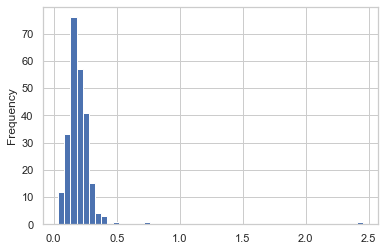

In [49]:
tips['tip_pct'].plot.hist(bins = 50)

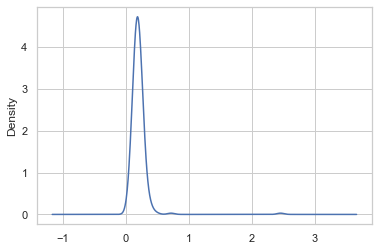

In [50]:
tips['tip_pct'].plot.density()

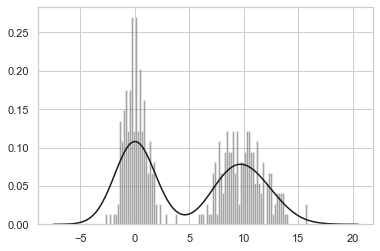

In [51]:
comp1 = np.random.normal(0,1,size = 200)
comp2 = np.random.normal(10,2,size = 200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins = 100, color = 'k')

## 9.2.4 Scatter or Point Plots

In [52]:
macro = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Data Science/Python/Python for data analysis 2nd/examples/macrodata.csv')

data = macro[['cpi','m1','tbilrate','unemp']]

trans_data = np.log(data).diff().dropna()

trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

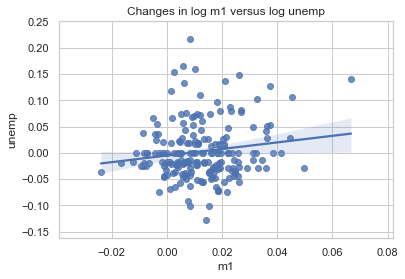

In [53]:
sns.regplot('m1','unemp', data = trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a pairs plot or scatter plot matrix

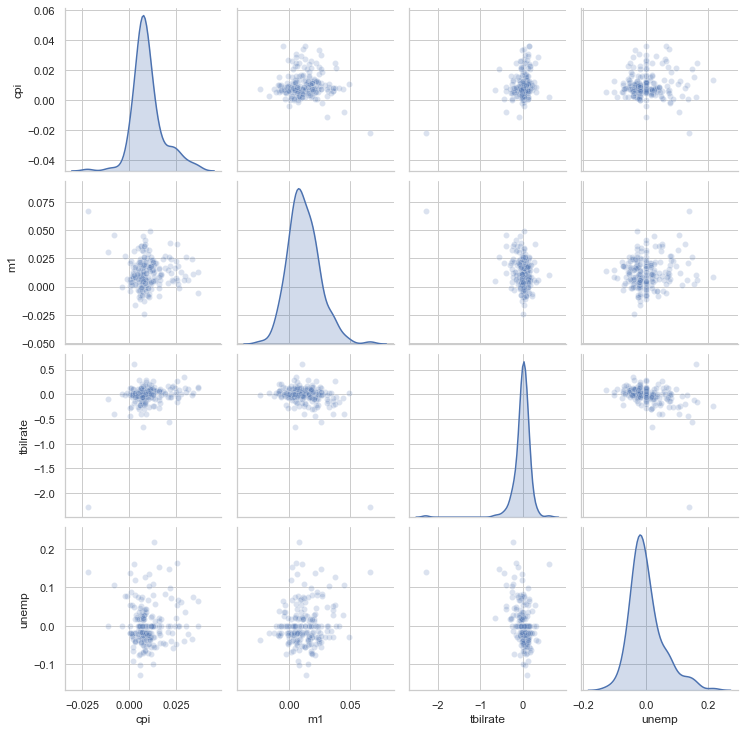

In [54]:
sns.pairplot(trans_data, diag_kind = 'kde', plot_kws = {'alpha':0.2})

## 9.2.5 Facet Grids and Categorical Data 

In [58]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


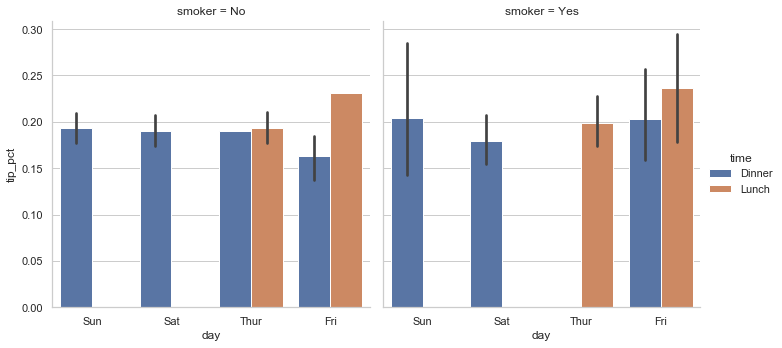

In [56]:
sns.catplot(x = 'day', y = 'tip_pct', hue = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tip_pct < 1])

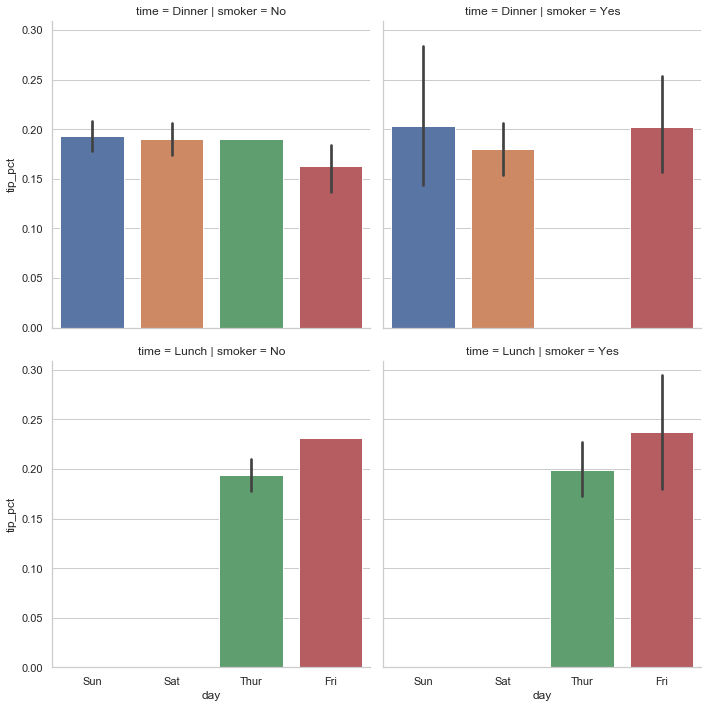

In [57]:
sns.catplot(x = 'day', y = 'tip_pct', row = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tip_pct < 1])

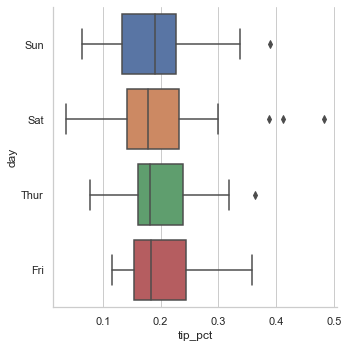

In [59]:
sns.catplot(x = 'tip_pct', y = 'day', kind = 'box', data = tips[tips.tip_pct < 0.5])

# 9.3 Other Python Visualization Tools

Interactive graphics: Bokeh, Plotly

# 9.4 Conclusion